# Methods of QuantumCircuit  
1. <a href="./combine_QC.ipynb">How can we combine quantum circuits ?</a>  compose

2. <a href="./decompose.ipynb">Decompose to a shallow circuit</a> decompose

3. initialize

# Qiskit state vector initialization

Reference:

https://qiskit.org/documentation/stubs/qiskit.extensions.Initialize.html

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize

1-minute Qiskit video:https://www.youtube.com/watch?v=tOWV94-ydL4

- Initialize qubits in a specific state
- Initialize steps  is carried as
1. reset the qubits
2. state prepartion(unitary)
- Initialize is an Instruction 
- not a Gate 
- it contains a reset instruction, which is not unitary.

### Qubit initialization is done by first resetting the qubits to |0⟩followed by an state preparing unitary. Both these steps are included in the Initialize instruction.

Arbitrary initialization:https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

In [1]:
from qiskit import QuantumCircuit,Aer,execute,transpile,BasicAer
from qiskit.visualization import *
import numpy as np

## Initialize the vector with the following :

$|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$

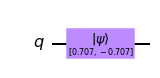

In [2]:


qc = QuantumCircuit(1)
qc.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
qc.draw(output="mpl")

In [3]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

In [4]:
print(sv)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


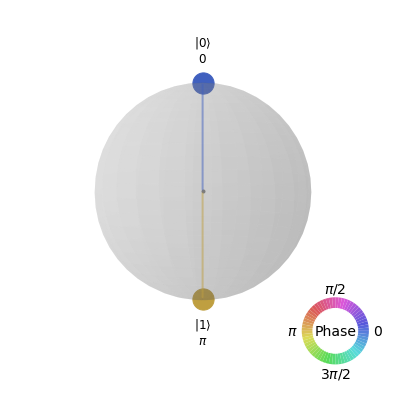

In [5]:
plot_state_qsphere(sv,show_state_phases=True)

## The initialization vector is for the following quantum circuit

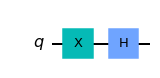

In [6]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw(output="mpl")

In [7]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## Let's take few more examples:

- Initialize from a string two qubits in the state |10>. 
- The order of the labels is reversed with respect to qubit index.

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize

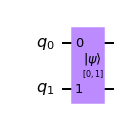

In [8]:
qc = QuantumCircuit(2)
qc.initialize('01', qc.qubits)
qc.draw(output="mpl")

In [9]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [10]:
array_to_latex(qc_state)

<IPython.core.display.Latex object>

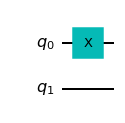

In [11]:
qc = QuantumCircuit(2)

qc.x(0)

qc.draw(output="mpl")

In [12]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## Initialize the qubit with complex amplitudes

In [13]:
qc = QuantumCircuit(2)
qc.initialize([0, 1/np.sqrt(2), -1.j/np.sqrt(2), 0], qc.qubits)
qc.draw()

┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │  Initialize(0,0.70711,-0.70711j,0) │
q_1: ┤1                                   ├
     └────────────────────────────────────┘

In [14]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([0.00000000e+00+0.00000000e+00j, 7.07106781e-01+8.32667268e-17j,
       1.11022302e-16-7.07106781e-01j, 0.00000000e+00+0.00000000e+00j])

In [15]:
array_to_latex(qc_state)

<IPython.core.display.Latex object>

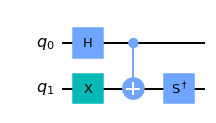

In [16]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.sdg(1)


qc.draw(output="mpl")

In [17]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>